# Test of classical models on phenotypic features
Evaluation of classical model performance and visualization of results

In [31]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd
import numpy as np
import json

In [32]:
src_dir = os.path.join(os.getcwd(), '..', 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)

## Preprocessing of the Data

Applying the steps in the first notebook in the data using data_preprocessing.py

In [33]:
from data_preprocessing import preprocess_data

file_path = '../data/Phenotypic_V1_0b_preprocessed1.csv'
data = preprocess_data(file_path)

processed_data_path = '../data/processed_data.csv'
data.to_csv(processed_data_path, index=True)
print("Data preprocessing complete. Processed data saved to '../data/processed_data.csv'.")

data.head()

Data loaded successfully.
Data preprocessing complete. Processed data saved to '../data/processed_data.csv'.


,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,EYE_STATUS_AT_SCAN,HANDEDNESS_L,HANDEDNESS_R
SUB_ID,,,,,,,,,
50003,1,24.45,1,124.0,128.0,115.0,2,0,1
50004,1,19.09,1,113.0,108.0,117.0,2,0,1
50005,1,13.73,2,119.0,117.0,118.0,2,0,1
50006,1,13.37,1,109.0,99.0,119.0,2,1,0
50007,1,17.78,1,110.0,106.0,112.0,2,0,1


In [34]:
data

,DX_GROUP,AGE_AT_SCAN,SEX,FIQ,VIQ,PIQ,EYE_STATUS_AT_SCAN,HANDEDNESS_L,HANDEDNESS_R
SUB_ID,,,,,,,,,
50003,1,24.45,1,124.0,128.0,115.0,2,0,1
50004,1,19.09,1,113.0,108.0,117.0,2,0,1
50005,1,13.73,2,119.0,117.0,118.0,2,0,1
50006,1,13.37,1,109.0,99.0,119.0,2,1,0
50007,1,17.78,1,110.0,106.0,112.0,2,0,1
...,...,...,...,...,...,...,...,...,...
51491,2,56.20,1,120.0,109.0,128.0,2,0,1
51493,2,29.20,2,102.0,101.0,103.0,2,0,1
51578,1,33.00,1,125.0,129.0,113.0,2,0,0


In [35]:
from sklearn.model_selection import train_test_split
from model_training import train_all_models

data = pd.read_csv(processed_data_path)
X = data.drop(columns='DX_GROUP')
y = data['DX_GROUP']

y = y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

trained_models = train_all_models(X_train, y_train)
print("Model training complete.")

Model training complete.


c:\Users\merye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from model_evaluation import evaluate_all_models, save_evaluation_results

initial_evaluation_results = evaluate_all_models(trained_models, X_test, y_test)

initial_evaluation_results_path = '../results/evaluation_metrics.json'
save_evaluation_results(initial_evaluation_results, initial_evaluation_results_path)
print(f"Model evaluation complete. Results saved to '{initial_evaluation_results_path}'.")

initial_evaluation_results

Evaluating all models...
Evaluating model: Decision Tree
Cross-validating model DecisionTreeClassifier(random_state=42)...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [0 0 0 0 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]
Evaluating model: Random Forest
Cross-validating model RandomForestClassifier(random_state=42)...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [0 0 0 0 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0.66 0.34]
 [0.75 0.25]
 [0.72 0.28]
 [0.64 0.36]
 [0.08 0.92]]
Evaluating model: SVC
Cross-validating model SVC(probability=True, random_state=42)...
Evaluati

c:\Users\merye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [1 1 1 1 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Evaluating model: LDA
Cross-validating model LinearDiscriminantAnalysis()...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [1 0 1 1 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0.36853616 0.63146384]
 [0.71508624 0.28491376]
 [0.4156683  0.5843317 ]
 [0.44943609 0.55056391]
 [0.3272098  0.6727902 ]]


c:\Users\merye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluating model: KNN
Cross-validating model KNeighborsClassifier()...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [0 0 1 0 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[1.  0. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]]
Evaluating model: Gradient Boosting
Cross-validating model GradientBoostingClassifier(random_state=42)...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [0 0 0 0 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0.94294782 0.05705218]
 [0.98341016 0.01658984]
 [0.53819556 0.46180444]
 [0.85162828 0.14837172]
 [0.03389021 0.96610979]]
Evaluating model: XGBoost
Cross-validating model XGBClassifier(base_s

c:\Users\merye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\merye\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [1 0 1 1 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0.44823126 0.55176874]
 [0.72403594 0.27596406]
 [0.49768669 0.50231331]
 [0.45885321 0.54114679]
 [0.34364128 0.65635872]]
Evaluating model: Naive Bayes
Cross-validating model GaussianNB()...
Evaluating model...
y_true (type): <class 'pandas.core.series.Series'>
y_pred (type): <class 'numpy.ndarray'>
y_true (sample): 521    0
284    0
513    0
331    0
210    1
Name: DX_GROUP, dtype: int64
y_pred (sample): [1 0 0 0 1]
y_prob (type): <class 'numpy.ndarray'>
y_prob (sample): [[0.29416763 0.70583237]
 [0.96810714 0.03189286]
 [0.59708985 0.40291015]
 [0.51886171 0.48113829]
 [0.17918011 0.82081989]]
Results saved to ../results/evaluation_metrics.json
Model evaluation complete. Results saved to '../results

{'Decision Tree': {'Accuracy': 0.615819209039548,
  'Precision': 0.6158906490924138,
  'Recall': 0.615819209039548,
  'F1-Score': 0.6129907015369975,
  'Sensitivity (ASD)': 0.5294117647058824,
  'Specificity (non-ASD)': 0.6956521739130435,
  'ROC AUC': 0.6125319693094629,
  'Confusion Matrix': [[64, 28], [40, 45]]},
 'Random Forest': {'Accuracy': 0.6779661016949152,
  'Precision': 0.6781328643764591,
  'Recall': 0.6779661016949152,
  'F1-Score': 0.6780278472415177,
  'Sensitivity (ASD)': 0.6705882352941176,
  'Specificity (non-ASD)': 0.6847826086956522,
  'ROC AUC': 0.747314578005115,
  'Confusion Matrix': [[63, 29], [28, 57]]},
 'SVC': {'Accuracy': 0.519774011299435,
  'Precision': 0.2701650228223052,
  'Recall': 0.519774011299435,
  'F1-Score': 0.3555331527103942,
  'Sensitivity (ASD)': 0.0,
  'Specificity (non-ASD)': 1.0,
  'ROC AUC': 0.4679028132992327,
  'Confusion Matrix': [[92, 0], [85, 0]]},
 'MLP': {'Accuracy': 0.480225988700565,
  'Precision': 0.23061700022343515,
  'Recall':

In [37]:
initial_evaluation_results

{'Decision Tree': {'Accuracy': 0.615819209039548,
  'Precision': 0.6158906490924138,
  'Recall': 0.615819209039548,
  'F1-Score': 0.6129907015369975,
  'Sensitivity (ASD)': 0.5294117647058824,
  'Specificity (non-ASD)': 0.6956521739130435,
  'ROC AUC': 0.6125319693094629,
  'Confusion Matrix': [[64, 28], [40, 45]]},
 'Random Forest': {'Accuracy': 0.6779661016949152,
  'Precision': 0.6781328643764591,
  'Recall': 0.6779661016949152,
  'F1-Score': 0.6780278472415177,
  'Sensitivity (ASD)': 0.6705882352941176,
  'Specificity (non-ASD)': 0.6847826086956522,
  'ROC AUC': 0.747314578005115,
  'Confusion Matrix': [[63, 29], [28, 57]]},
 'SVC': {'Accuracy': 0.519774011299435,
  'Precision': 0.2701650228223052,
  'Recall': 0.519774011299435,
  'F1-Score': 0.3555331527103942,
  'Sensitivity (ASD)': 0.0,
  'Specificity (non-ASD)': 1.0,
  'ROC AUC': 0.4679028132992327,
  'Confusion Matrix': [[92, 0], [85, 0]]},
 'MLP': {'Accuracy': 0.480225988700565,
  'Precision': 0.23061700022343515,
  'Recall':

In [38]:
from evaluate import visualization

In [39]:
def visualize_evaluation_results(evaluation_results):
    data = [{metric: value for metric, value in metrics.items() if metric != 'Confusion Matrix'}
            for metrics in evaluation_results.values()]
    model_names = list(evaluation_results.keys())
    
    fig = visualization.radar_plot(
        data=data,
        model_names=model_names,  # Corrected from 'names' to 'model_names'
        config={
            "rad_ln_args": {"visible": True},
            "outer_ring": {"visible": True},
            "angle_ln_args": {"visible": True},
            "rgrid_tick_lbls_args": {"fontsize": 12},
            "theta_tick_lbls": {"fontsize": 12},
            "theta_tick_lbls_pad": 3,
            "theta_tick_lbls_brk_lng_wrds": True,
            "theta_tick_lbls_txt_wrap": 15,
            "incl_endpoint": False,
            "marker": "o",
            "markersize": 3,
            "legend_loc": "upper right",
            "bbox_to_anchor": (1.1, 1.05)
        }
    )
    fig.show()


C:\Users\merye\AppData\Local\Temp\ipykernel_25956\1765904308.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


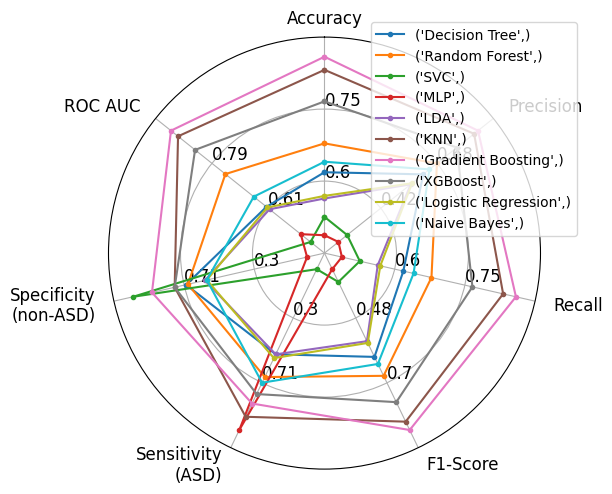

In [40]:
visualize_evaluation_results(initial_evaluation_results)

In [41]:
evaluation_df = pd.DataFrame(initial_evaluation_results).T
evaluation_df

,Accuracy,Precision,Recall,F1-Score,Sensitivity (ASD),Specificity (non-ASD),ROC AUC,Confusion Matrix
Decision Tree,0.615819,0.615891,0.615819,0.612991,0.529412,0.695652,0.612532,"[[64, 28], [40, 45]]"
Random Forest,0.677966,0.678133,0.677966,0.678028,0.670588,0.684783,0.747315,"[[63, 29], [28, 57]]"
SVC,0.519774,0.270165,0.519774,0.355533,0.0,1.0,0.467903,"[[92, 0], [85, 0]]"
MLP,0.480226,0.230617,0.480226,0.311597,1.0,0.0,0.5,"[[0, 92], [0, 85]]"
LDA,0.559322,0.558957,0.559322,0.559068,0.529412,0.586957,0.60243,"[[54, 38], [40, 45]]"
KNN,0.836158,0.847098,0.836158,0.835529,0.917647,0.76087,0.902685,"[[70, 22], [7, 78]]"
Gradient Boosting,0.864407,0.864912,0.864407,0.864216,0.835294,0.891304,0.925895,"[[82, 10], [14, 71]]"
XGBoost,0.768362,0.768981,0.768362,0.76845,0.776471,0.76087,0.846803,"[[70, 22], [19, 66]]"
Logistic Regression,0.564972,0.565175,0.564972,0.565055,0.552941,0.576087,0.609847,"[[53, 39], [38, 47]]"
Naive Bayes,0.638418,0.644226,0.638418,0.637285,0.705882,0.576087,0.65422,"[[53, 39], [25, 60]]"


Feature importances for Decision Tree:
        Feature  Importance
0        SUB_ID    0.778738
5           PIQ    0.090597
4           VIQ    0.051523
8  HANDEDNESS_R    0.041877
1   AGE_AT_SCAN    0.026421
Feature importances for Random Forest:
       Feature  Importance
0       SUB_ID    0.436088
3          FIQ    0.124059
1  AGE_AT_SCAN    0.116722
5          PIQ    0.114704
4          VIQ    0.113475
SVC does not support feature importance or coefficient extraction.
MLP does not support feature importance or coefficient extraction.
Feature importances for LDA:
              Feature  Coefficient
2                 SEX     0.833155
6  EYE_STATUS_AT_SCAN     0.365554
3                 FIQ     0.098322
0              SUB_ID     0.000234
1         AGE_AT_SCAN    -0.022915
KNN does not support feature importance or coefficient extraction.
Feature importances for Gradient Boosting:
        Feature  Importance
0        SUB_ID    0.858418
8  HANDEDNESS_R    0.047133
5           PIQ    0.0339

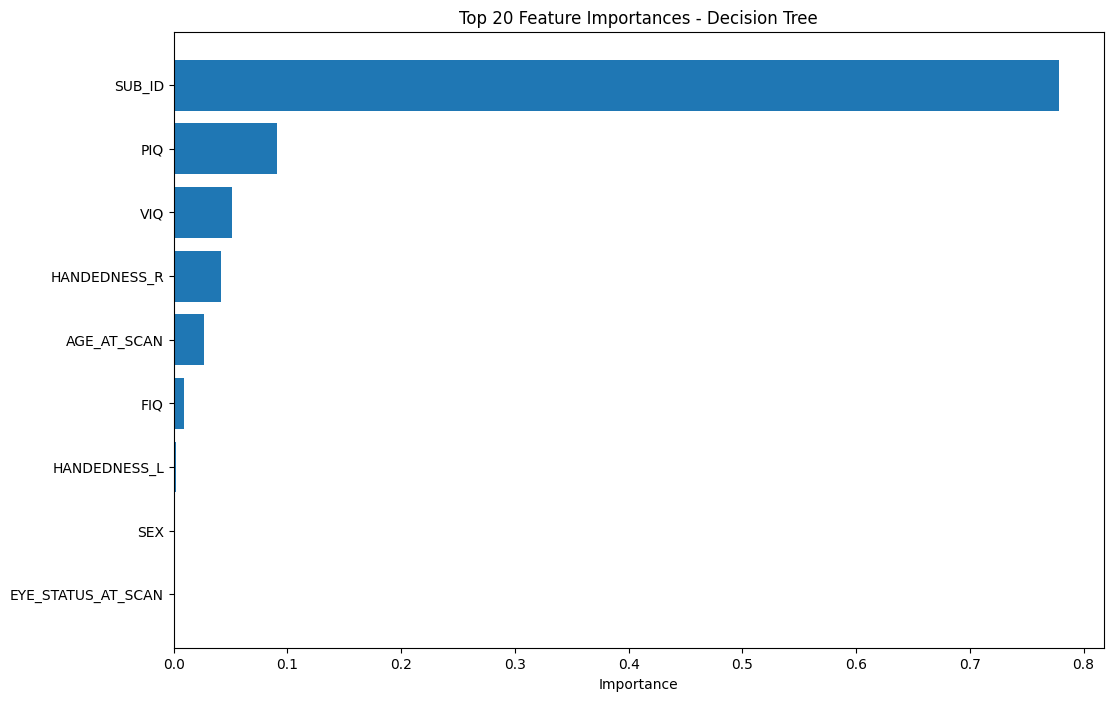

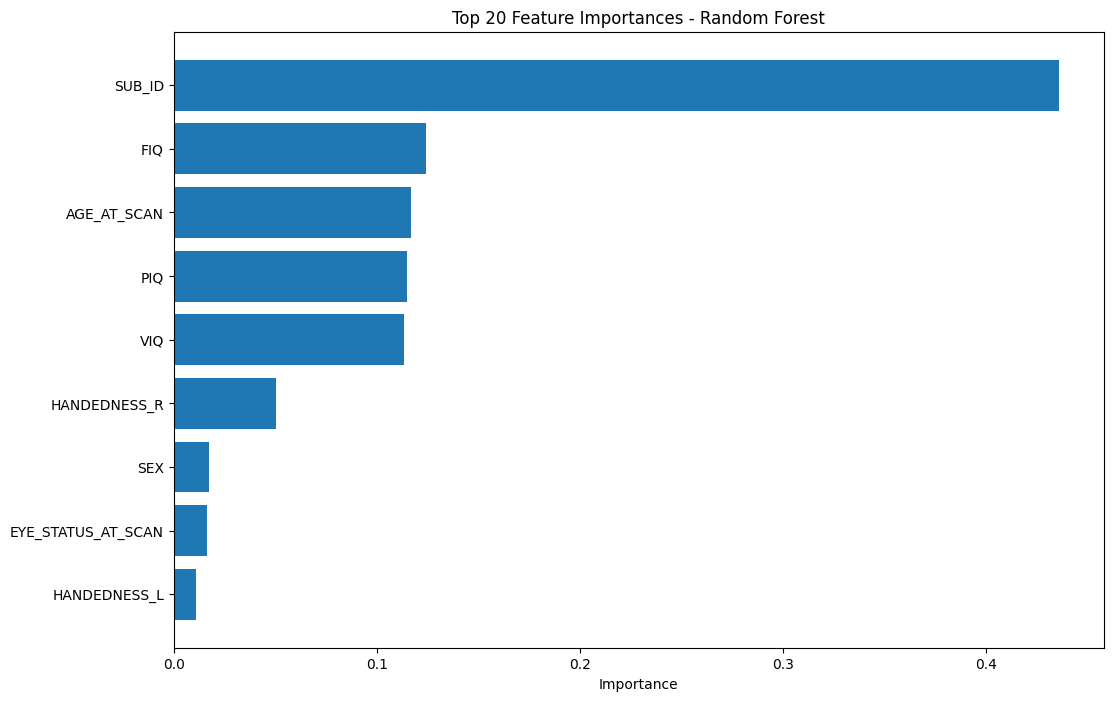

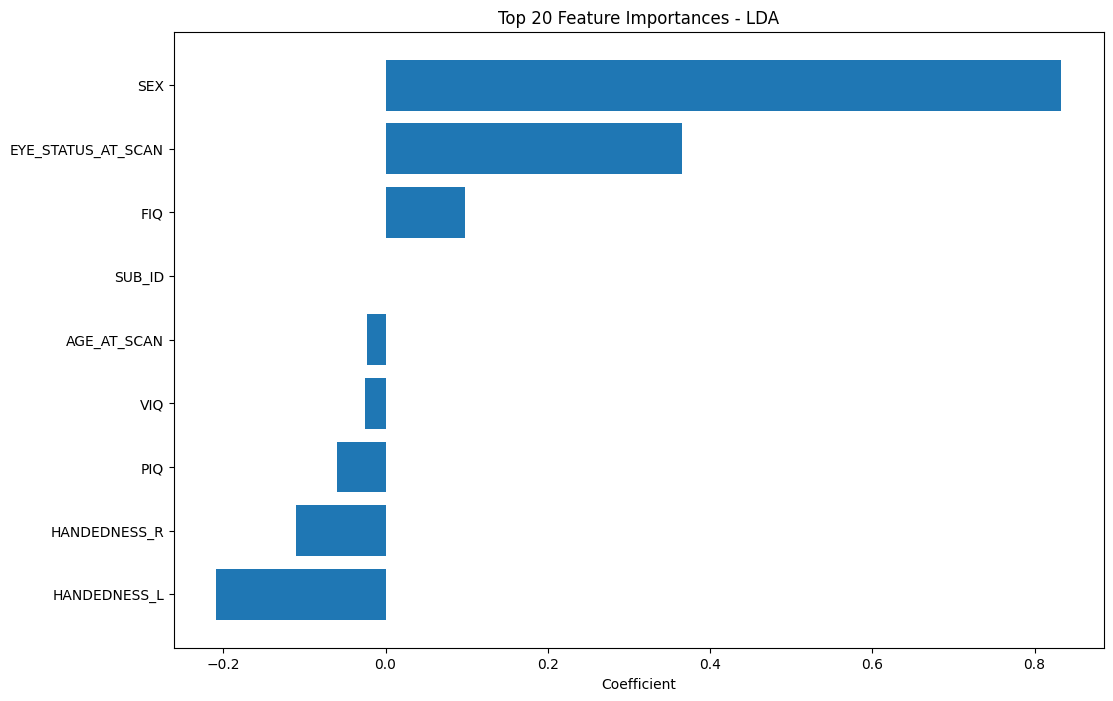

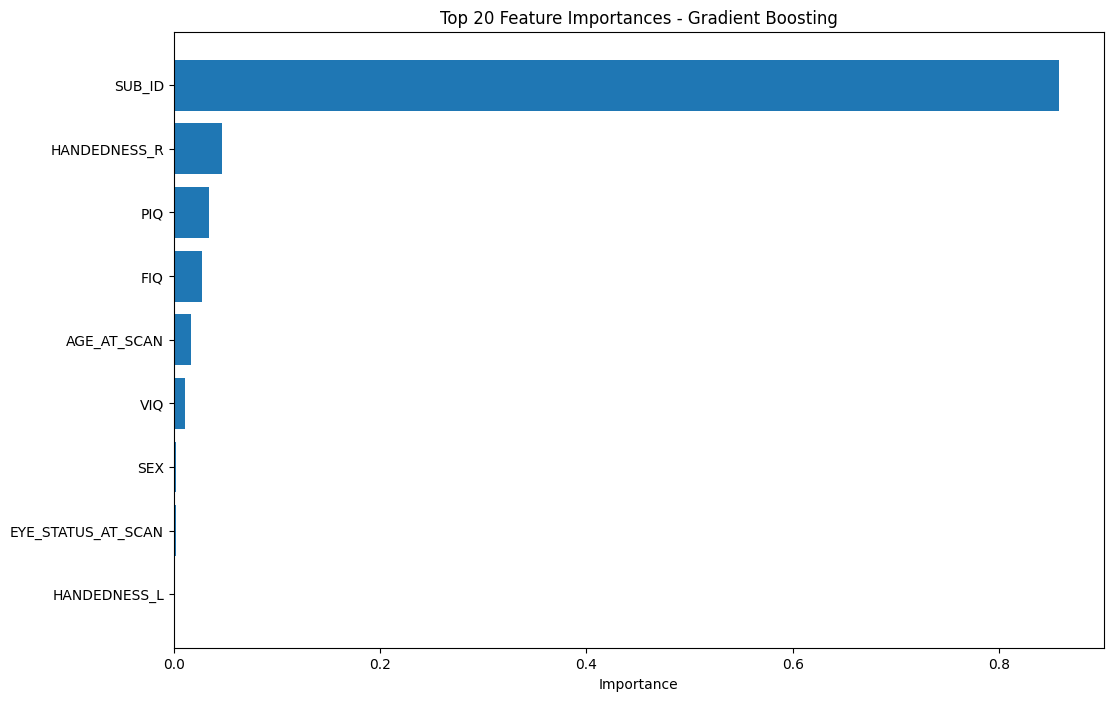

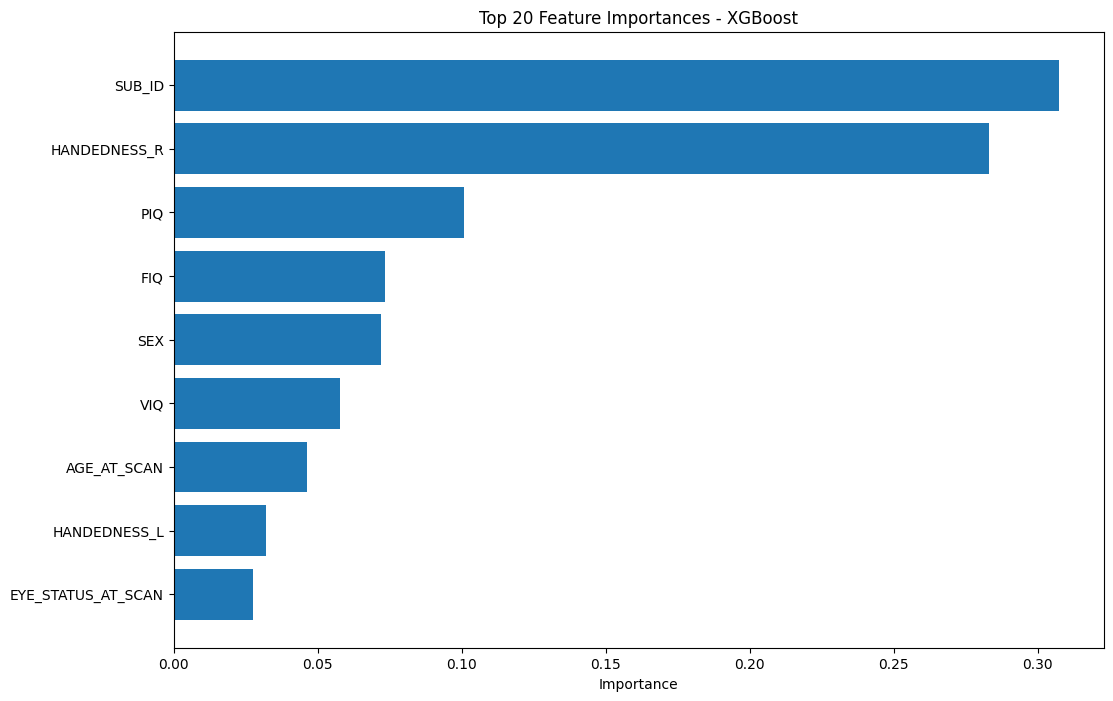

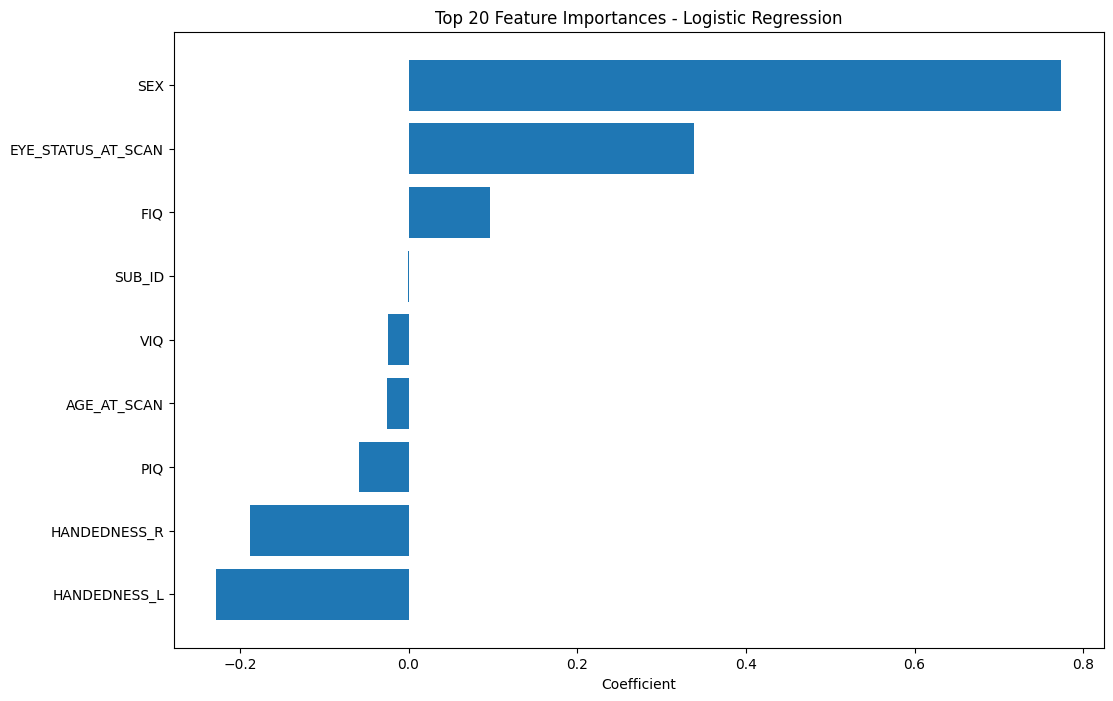

In [42]:
def extract_feature_importances(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        return pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
    elif hasattr(model, 'coef_'):
        coefficients = model.coef_.flatten()
        return pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}).sort_values(by='Coefficient', ascending=False)
    else:
        print(f"{model_name} does not support feature importance or coefficient extraction.")
        return pd.DataFrame()


feature_importance_dfs = {}
for name, model in trained_models.items():
    feature_importance_dfs[name] = extract_feature_importances(model, name, X.columns)
    if not feature_importance_dfs[name].empty:
        print(f"Feature importances for {name}:")
        print(feature_importance_dfs[name].head())


def plot_top_features(df, model_name, top_n=20):
    if not df.empty:
        df_top = df.head(top_n)
        plt.figure(figsize=(12, 8))
        plt.title(f"Top {top_n} Feature Importances - {model_name}")
        plt.barh(df_top['Feature'], df_top['Importance'] if 'Importance' in df_top.columns else df_top['Coefficient'])
        plt.xlabel('Importance' if 'Importance' in df_top.columns else 'Coefficient')
        plt.gca().invert_yaxis()
        plt.show()

top_n = 20
for name, df in feature_importance_dfs.items():
    plot_top_features(df, name, top_n)

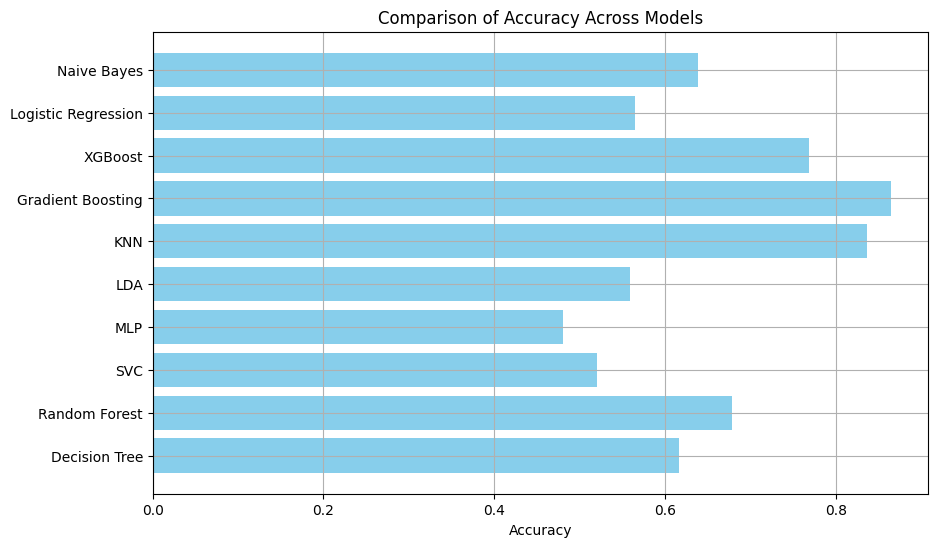

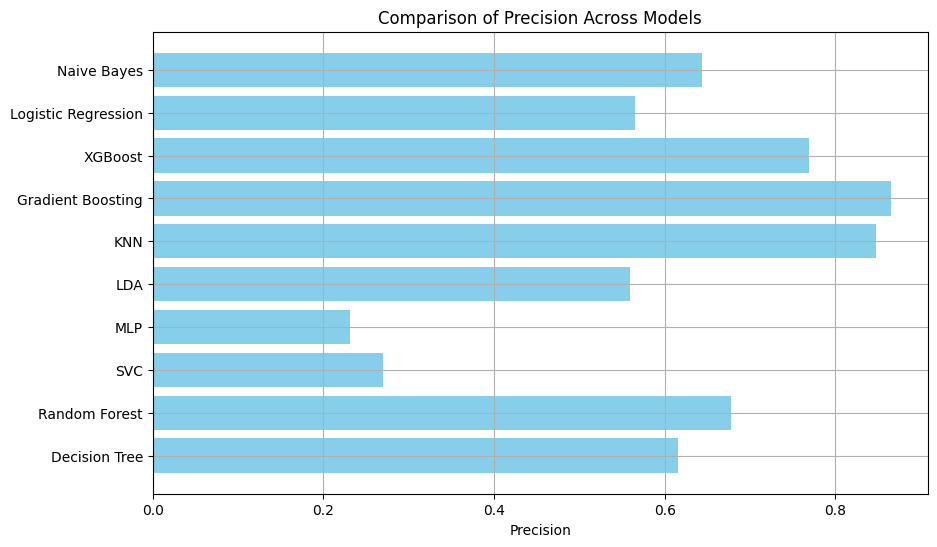

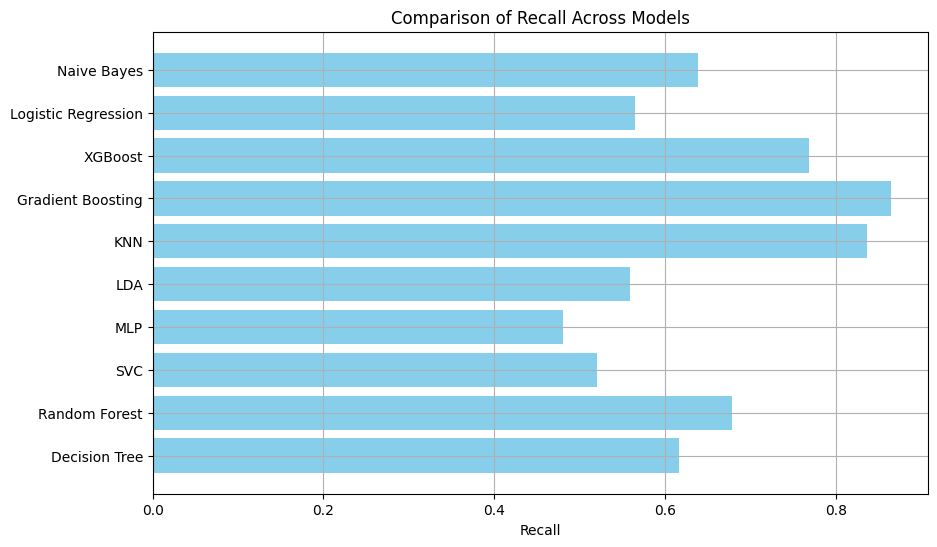

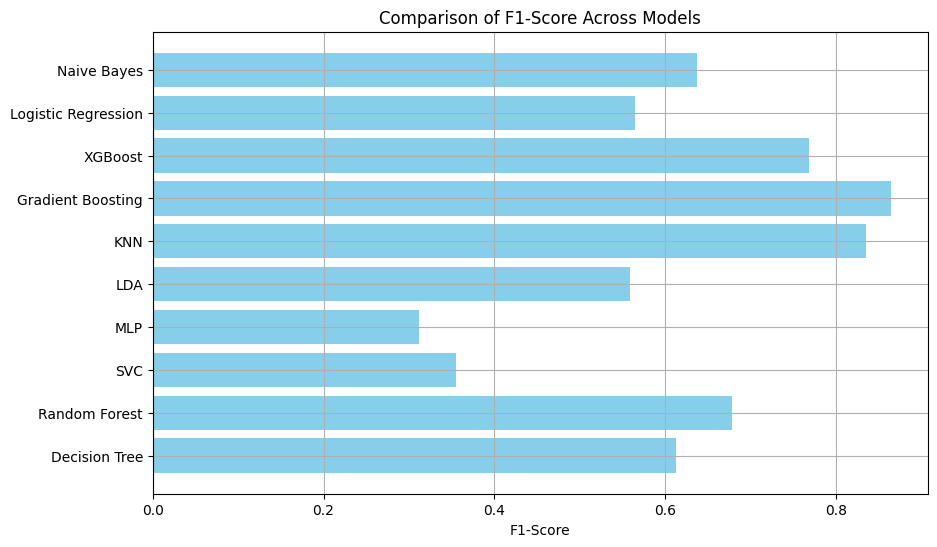

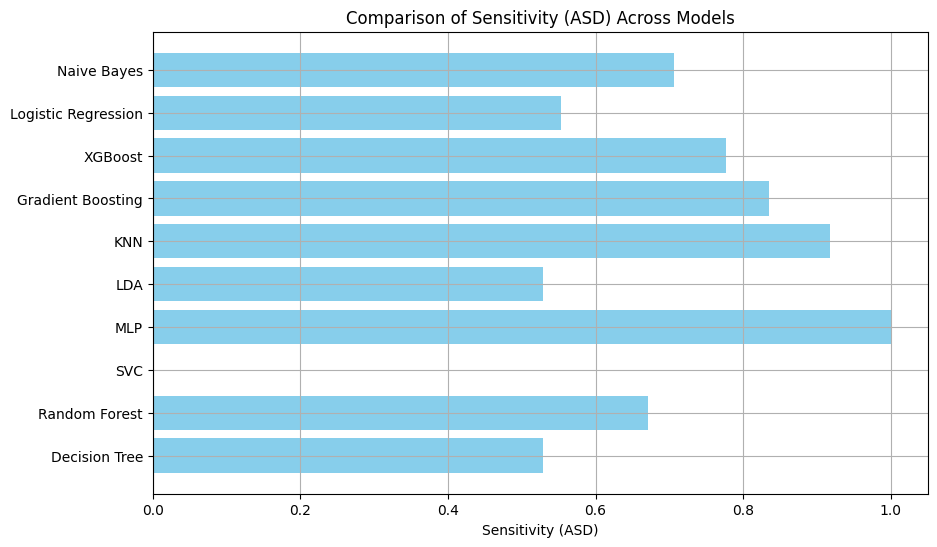

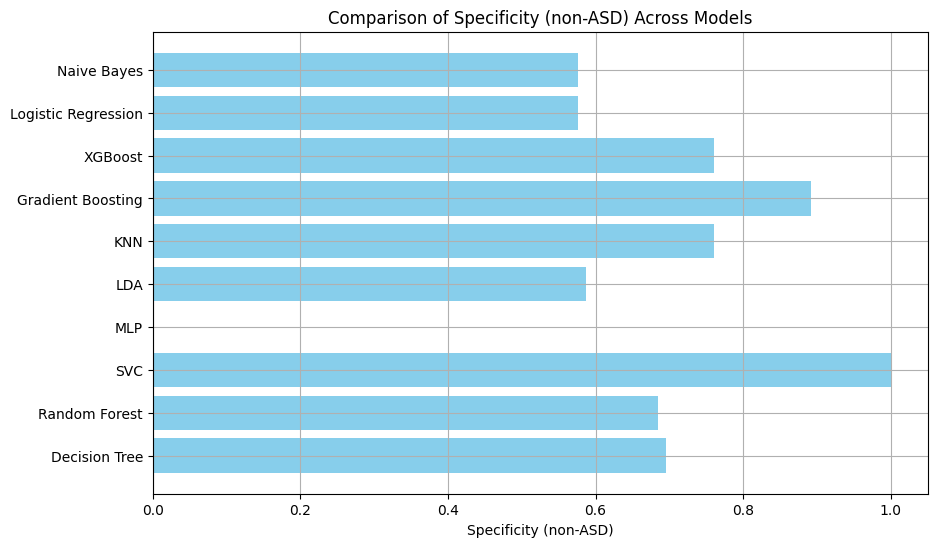

In [43]:
def plot_metrics(metrics, metric_name):
    models = list(metrics.keys())
    values = [metrics[model][metric_name] for model in models]
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, values, color='skyblue')
    plt.xlabel(metric_name)
    plt.title(f'Comparison of {metric_name} Across Models')
    plt.grid(True)
    plt.show()

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics_to_plot:
    plot_metrics(initial_evaluation_results, metric)

plot_metrics(initial_evaluation_results, 'Sensitivity (ASD)')
plot_metrics(initial_evaluation_results, 'Specificity (non-ASD)')

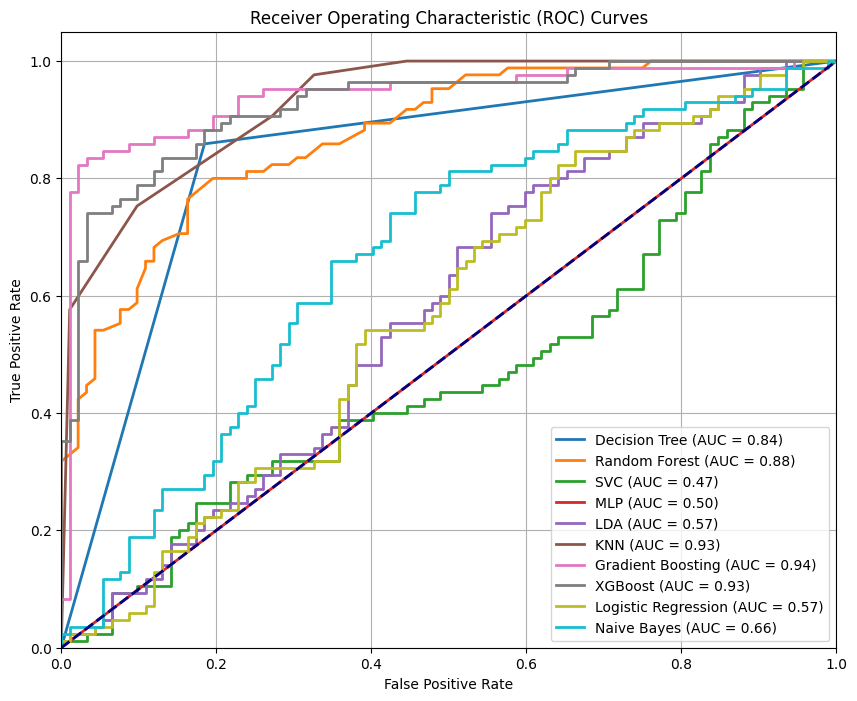

In [44]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_auc(trained_models, X_test, y_test)

In [45]:
from model_tuning import perform_grid_search, evaluate_on_test_set, save_tuning_results
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import json

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


best_estimators, evaluation_results = perform_grid_search(X_train, y_train)
evaluate_on_test_set(best_estimators, X_test, y_test, evaluation_results)

evaluation_results_path = '../results/hyperparameter_tuning_results.json'
save_tuning_results(evaluation_results, evaluation_results_path)
print(f"Model hyperparameter tuning and evaluation complete. Results saved to '{evaluation_results_path}'.")

with open(evaluation_results_path, 'r') as f:
    tuning_results = json.load(f)

print("Hyperparameter Tuning Results:")
print(json.dumps(tuning_results, indent=4))


Performing Grid Search for Random Forest...


KeyboardInterrupt: 

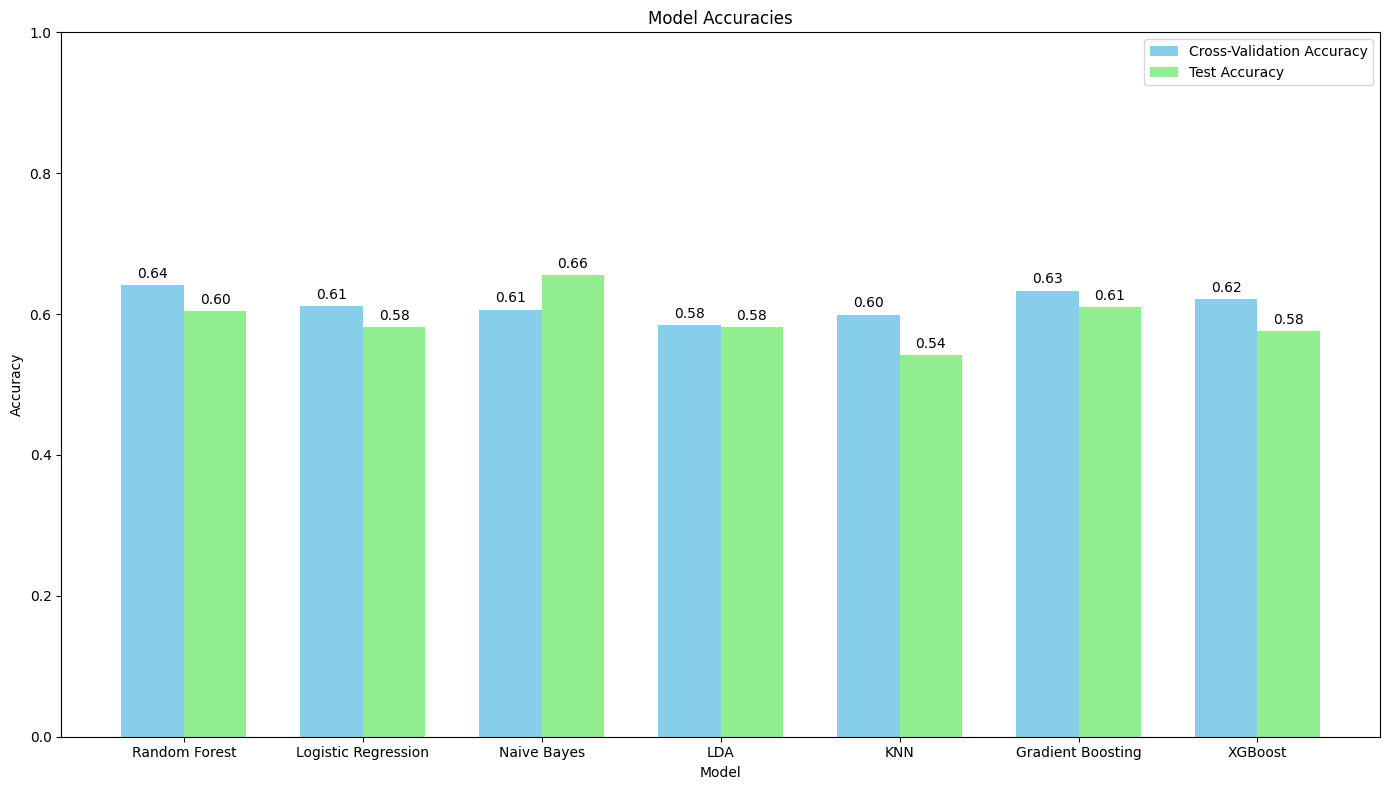

In [ ]:
models = list(tuning_results.keys())
cross_val_accuracies = [tuning_results[model]['best_cross_val_accuracy'] for model in models]
test_accuracies = [tuning_results[model]['test_accuracy'] for model in models]

bar_width = 0.35
index = np.arange(len(models))
fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(index, cross_val_accuracies, bar_width, label='Cross-Validation Accuracy', color='skyblue')
bars2 = ax.bar(index + bar_width, test_accuracies, bar_width, label='Test Accuracy', color='lightgreen')

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)


ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
initial_evaluation_results

{'Decision Tree': {'Accuracy': 0.4915254237288136,
  'Precision': 0.4919756694157629,
  'Recall': 0.4915254237288136,
  'F1-Score': 0.49168785491213557,
  'Sensitivity (ASD)': 0.4823529411764706,
  'Specificity (non-ASD)': 0.5,
  'ROC AUC': 0.4911764705882353,
  'Confusion Matrix': [[46, 46], [44, 41]]},
 'Random Forest': {'Accuracy': 0.559322033898305,
  'Precision': 0.559322033898305,
  'Recall': 0.559322033898305,
  'F1-Score': 0.559322033898305,
  'Sensitivity (ASD)': 0.5411764705882353,
  'Specificity (non-ASD)': 0.5760869565217391,
  'ROC AUC': 0.625383631713555,
  'Confusion Matrix': [[53, 39], [39, 46]]},
 'SVC': {'Accuracy': 0.6271186440677966,
  'Precision': 0.6372971033987983,
  'Recall': 0.6271186440677966,
  'F1-Score': 0.6240073105458976,
  'Sensitivity (ASD)': 0.7294117647058823,
  'Specificity (non-ASD)': 0.532608695652174,
  'ROC AUC': 0.40479539641943735,
  'Confusion Matrix': [[49, 43], [23, 62]]},
 'MLP': {'Accuracy': 0.519774011299435,
  'Precision': 0.527152373724

In [ ]:
tuning_results

{'Random Forest': {'best_params': {'classifier__bootstrap': True,
   'classifier__max_depth': 20,
   'classifier__max_features': 'sqrt',
   'classifier__min_samples_leaf': 4,
   'classifier__min_samples_split': 10,
   'classifier__n_estimators': 200},
  'best_cross_val_accuracy': 0.6405923344947734,
  'test_accuracy': 0.6045197740112994},
 'Logistic Regression': {'best_params': {'classifier__C': 0.1,
   'classifier__max_iter': 100,
   'classifier__penalty': 'l1',
   'classifier__solver': 'saga',
   'classifier__tol': 0.0001},
  'best_cross_val_accuracy': 0.6115563298490129,
  'test_accuracy': 0.5819209039548022},
 'Naive Bayes': {'best_params': {'classifier__var_smoothing': 1e-09},
  'best_cross_val_accuracy': 0.6065040650406504,
  'test_accuracy': 0.655367231638418},
 'LDA': {'best_params': {'classifier__shrinkage': 0.7777777777777777,
   'classifier__solver': 'lsqr'},
  'best_cross_val_accuracy': 0.5844947735191639,
  'test_accuracy': 0.5819209039548022},
 'KNN': {'best_params': {'cl

In [ ]:
initial_evaluation_results.keys()

dict_keys(['Decision Tree', 'Random Forest', 'SVC', 'MLP', 'LDA', 'KNN', 'Gradient Boosting', 'XGBoost', 'Logistic Regression', 'Naive Bayes'])

In [ ]:
tuning_results.keys()

dict_keys(['Random Forest', 'Logistic Regression', 'Naive Bayes', 'LDA', 'KNN', 'Gradient Boosting', 'XGBoost'])

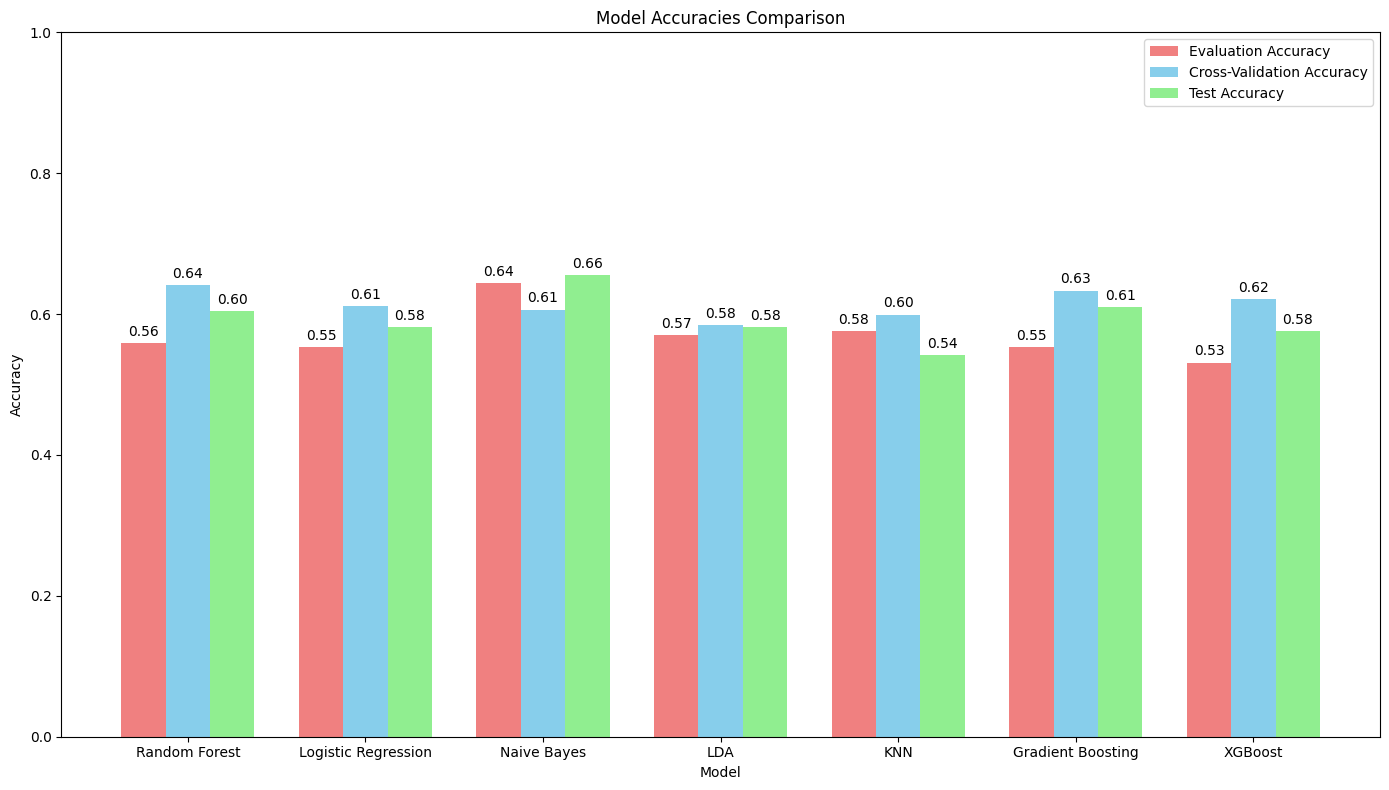

In [ ]:
models = list(tuning_results.keys())

evaluation_accuracies = [initial_evaluation_results[model]['Accuracy'] for model in models]
cross_val_accuracies = [tuning_results[model]['best_cross_val_accuracy'] for model in models]
test_accuracies = [tuning_results[model]['test_accuracy'] for model in models]

bar_width = 0.25
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(14, 8))

bars1 = ax.bar(index, evaluation_accuracies, bar_width, label='Evaluation Accuracy', color='lightcoral')

bars2 = ax.bar(index + bar_width, cross_val_accuracies, bar_width, label='Cross-Validation Accuracy', color='skyblue')

bars3 = ax.bar(index + 2 * bar_width, test_accuracies, bar_width, label='Test Accuracy', color='lightgreen')

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars3:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracies Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)

ax.legend()

plt.tight_layout()
plt.show()